In [237]:
import pickle
noise_index = 0
with open(f'/home//StepByStep/InformationFlow/result/{noise_index}/data_input_id.pickle', 'rb') as f:
    data_input_id = pickle.load(f)

In [238]:
from transformers import LlamaForCausalLM, LlamaTokenizer
MODEL_PATH = '/home/models//Llama-2-7b-hf'

tokenizer = LlamaTokenizer.from_pretrained(MODEL_PATH)

In [239]:

def nested_data(data, entry):
    nested_dict = {}
    if(entry not in data):
        print("Not present")
        return None
    for d in data[entry]:
        nested_dict[d] = nested_data(data, d)
    return nested_dict

In [240]:
# nested = {}

# def nested_data(data, entry):
#     nested_dict = {}
#     new_entry = entry.split('_tokenPassed')[0]
#     # print(new_entry)
#     if(new_entry not in data):
#         # print("Not present")
#         return None
#     for d in data[new_entry]:
#         nested_dict[d] = nested_data(data, d)
#     return nested_dict

# for entry in depth_0_entry:
#     nested[entry] = nested_data(clean_data, entry)



In [241]:
# def getNestedData(data):
#     clean_data = {}
#     for d in data:
#         attend = []
#         for d1 in d['attending_layer_head']:
#             attend.append(f'layer_{d1["layer"]}_head_{d1["head"]}_pos_{d1["pos"]}')
#         clean_data[f'layer_{d["layer"]}_head_{d["head"]}_pos_{d["pos"]}'] = attend


# depth_0_entry = []
# for d in data:
#     if d['depth'] == 0:
#         depth_0_entry.append(f'layer_{d["layer"]}_head_{d["head"]}_pos_{d["pos"]}')
# nested = {}

# for entry in depth_0_entry:
#     print(entry)
#     nested[entry] = nested_data(clean_data, entry)
# return nested

In [242]:
def getNestedData(data, input_id):
    clean_data = {}
    for d in data:
        attend = []
        for d1 in d['attending_layer_head']:
            token = tokenizer.decode(input_id[d1['pos']])
            token_passed = tokenizer.decode(d1['input_id'])
            attend.append(f'layer_{d1["layer"]}_head_{d1["head"]}_token_{token}_pos_{d1["pos"]}_tokenPassed_{token_passed}')
        token = tokenizer.decode(input_id[d['pos']])
        clean_data[f'layer_{d["layer"]}_head_{d["head"]}_token_{token}_pos_{d["pos"]}'] = attend
    
    depth_0_entry = []
    for d in data:
        if d['depth'] == 0:
            depth_0_entry.append(f'layer_{d["layer"]}_head_{d["head"]}_token_{tokenizer.decode(input_id[d["pos"]])}_pos_{d["pos"]}')
    

    
    nested = {}

    def nested_data(data, entry):
        nested_dict = {}
        new_entry = entry.split('_tokenPassed')[0]
        # print(new_entry)
        if(new_entry not in data):
            # print("Not present")
            return None
        for d in data[new_entry]:
            nested_dict[d] = nested_data(data, d)
        return nested_dict

    for entry in depth_0_entry:
        nested[entry] = nested_data(clean_data, entry)
    
    return nested


    

In [243]:
# depth_0_entry = []
# for d in data:
#     if d['depth'] == 0:
#         depth_0_entry.append(f'layer_{d["layer"]}_head_{d["head"]}_token_{tokenizer.decode(input_id[d["pos"]])}_pos_{d["pos"]}')

In [244]:
# nested = {}

# def nested_data(data, entry):
#     nested_dict = {}
#     new_entry = entry.split('_tokenPassed')[0]
#     # print(new_entry)
#     if(new_entry not in data):
#         # print("Not present")
#         return None
#     for d in data[new_entry]:
#         nested_dict[d] = nested_data(data, d)
#     return nested_dict

# for entry in depth_0_entry:
#     nested[entry] = nested_data(clean_data, entry)



In [245]:
'layer_13_head_22_token_<s>_pos_0_tokenPassed_sierp'.split('layer_')

['', '13_head_22_token_<s>_pos_0_tokenPassed_sierp']

In [246]:
complete_data = []
for example in data_input_id:
    layer_head_context_data = []
    data = example['data']
    input_id = example['input_id']
    answer = example['answer']
    
    # nested_data = getNestedData(data, input_id)
    # # iterate over the dictionary
    # for key, value in nested_data.items():
    #     if('pos_-1' in key):
    #         depth_keys = list(nested_data[key].keys())
    #         for k in depth_keys:
    #             pos = int(k.split('pos_')[1].split('_')[0])
    #             layer = int(k.split('layer_')[1].split('_')[0])
    #             head = int(k.split('head_')[1].split('_')[0])
    #             if((layer, head, pos) not in layer_head_context_data):
    #                 layer_head_context_data.append((layer, head, pos))
    # complete_data.append(layer_head_context_data)
                
                # layer_head_context_data.append
    # for key in nested_data:
        # print(key)
    # break
    # count = 0
    for d in data:
        if(tokenizer.decode(input_id[d['pos']]) == answer):
        # count += 1
        # if(f'token_{answer[count]}_' in )
            if((d['layer'], d['head'], d['pos']) not in layer_head_context_data):
                layer_head_context_data.append((d['layer'], d['head'], d['pos']))
            for attending in d['attending_layer_head']:
                # print(attending)
                if((attending['layer'], attending['head'], attending['pos']) not in layer_head_context_data):
                    layer_head_context_data.append((attending['layer'], attending['head'], attending['pos']))
                # max_depth = max(max_depth, d['depth'] + 1)
    complete_data.append(layer_head_context_data)

In [247]:
len(complete_data)

29

In [248]:
def FindPartOfSentence(input_id, pos):
    input_id_number = []
    input_token_pos = 0
    dot_number = 0
    dot_1 = 0
    dot_2 = 0
    dot_3 = 0
    dot_4 = 0
    dot_5 = 0

    for i in range(len(input_id)):
        if(tokenizer.decode(input_id[i]) == 'Input'):
            input_token_pos = i
    # for i in range(input_token_pos, len(input_id)):
    #     # print(tokenizer.decode(input_id[i]), end=' ')
    #     if(tokenizer.decode(input_id[i]) == '.'):
    #         dot_number += 1
    #         dot_1 = i
    #         break
    # # print(dot_1)
    # for i in range(dot_1 + 1, len(input_id)):
    #     # print(tokenizer.decode(input_id[i]), end=' ')
    #     if(tokenizer.decode(input_id[i]) == '.'):
    #         dot_number += 1
    #         dot_2 = i
    #         break
    # # print(dot_2)

    # for i in range(dot_2 + 1, len(input_id)):
    #     # print(tokenizer.decode(input_id[i]), end=' ')
    #     if(tokenizer.decode(input_id[i]) == '.'):
    #         dot_number += 1
    #         dot_3 = i
    #         break
    # # print(dot_3)

    # for i in range(dot_3 + 1, len(input_id)):
    #     # print(tokenizer.decode(input_id[i]), end=' ')
    #     if(tokenizer.decode(input_id[i]) == '.'):
    #         dot_number += 1
    #         dot_4 = i
    #         break
    # for i in range(dot_4 + 1, len(input_id)):
    #     # print(tokenizer.decode(input_id[i]), end=' ')
    #     if(tokenizer.decode(input_id[i]) == '.'):
    #         dot_number += 1
    #         dot_5 = i
    #         break
    # print(input_token_pos, dot_1, dot_2, dot_3, dot_4, dot_5)
    response_token_position = 0
    for i in range(len(input_id)):
        if(tokenizer.decode(input_id[i]) == 'Response'):
            response_token_position = i
    # dot_6 = 0
    # for i in range(response_position + 1, len(input_id)):
    #     if(tokenizer.decode(input_id[i]) == '.'):
    #         dot_6 = i
    #         break
    # dot_7 = 0
    # for i in range(dot_6 + 1, len(input_id)):
    #     if(tokenizer.decode(input_id[i]) == '.'):
    #         dot_7 = i
    #         break
    # dot_8 = 0
    # for i in range(dot_7 + 1, len(input_id)):
    #     if(tokenizer.decode(input_id[i]) == '.'):
    #         dot_8 = i
    #         break
    # dot_9 = 0
    # for i in range(dot_8 + 1, len(input_id)):
    #     if(tokenizer.decode(input_id[i]) == '.'):
    #         dot_9 = i
    #         break
        
    if(pos <= input_token_pos - 5):
        return 'fewShot'
    elif(pos <= response_token_position - 4):
        return 'context'
    
    # if(pos <= dot_1):
    #     return 'statement_1'
    # if(pos <= dot_2):
    #     return 'statement_2'
    # if(pos <= dot_3):
    #     return 'statement_3'
    # if(pos <= dot_4):
    #     return 'statement_4'
    # if(pos <= dot_5):
    #     return 'statement_5'
    # if(pos <= dot_6):
    #     return 'generated_1'
    # if(pos <= dot_7):
    #     return 'generated_2'
    # if(pos <= dot_8):
    #     return 'generated_3'
    # if(pos <= dot_9):
    #     return 'generated_4'
    return 'generated'

In [249]:
FindPartOfSentence(input_id, 0)

'fewShot'

In [250]:
for i in range(579, len(input_id)):
    print(tokenizer.decode(input_id[i]), end=' ')
    if(tokenizer.decode(input_id[i]) == '.'):
        dot_5 = i
        break

Input : <0x0A> Gr imp uses are liquid . 

In [251]:
for i in range(len(input_id)):
    print(tokenizer.decode(input_id[i]), end=' ')

<s> <s> <s> <s> <s> <s> <s> ### Input : <0x0A> G or pus is tw imp us . Alex is rom pus . Rom pus is g or pus . Gor pus is small . Rom pus is mean . True or false : Alex is small . Let us think step by step . <0x0A> ## # Response : <0x0A> Alex is rom pus . Rom pus is g or pus . Alex is g or pus . Gor pus is small . Alex is small . True <0x0A> <0x0A> ## # Input : <0x0A> G orp uses are disc ord ant . Max is zum pus . Z ump us is sh amp or . Z ump us is g or pus . Gor pus is earth y . True or false : Max is small . Let us think step by step .  <0x0A> ## # Response : <0x0A> Max is zum pus . Z ump us is g or pus . Max is g or pus . Gor p uses are disc ord ant . Max is disc ord ant . False <0x0A> <0x0A> ## # Input : <0x0A> B or pin are w ump us . W ump uses are angry . W ump us is j empor . S ally is le mp us . L emp us is w ump us . True or false : S ally is fl oral . Let us think step by step .  <0x0A> ## # Response : <0x0A> S ally is le mp us . L emp us is w ump us . S ally is w ump us . W

In [252]:
print(tokenizer.decode(input_id))

<s><s><s><s><s><s><s> ### Input:
Gorpus is twimpus. Alex is rompus. Rompus is gorpus. Gorpus is small. Rompus is mean. True or false: Alex is small. Let us think step by step.
### Response:
Alex is rompus. Rompus is gorpus. Alex is gorpus. Gorpus is small. Alex is small. True

### Input:
Gorpuses are discordant. Max is zumpus. Zumpus is shampor. Zumpus is gorpus. Gorpus is earthy. True or false: Max is small. Let us think step by step. 
### Response:
Max is zumpus. Zumpus is gorpus. Max is gorpus. Gorpuses are discordant. Max is discordant. False

### Input:
Borpin are wumpus. Wumpuses are angry. Wumpus is jempor. Sally is lempus. Lempus is wumpus. True or false: Sally is floral. Let us think step by step. 
### Response:
Sally is lempus. Lempus is wumpus. Sally is wumpus. Wumpuses are angry. Sally is angry. False

### Input:
Gorpus is jelgit. Yumpuses are loud. Gorpus is yumpus. Yumpus is orange. Rex is gorpus. True or false: Rex is loud. Let us think step by step.
### Response:
Rex is

In [253]:
layer_head = {}
from tqdm import tqdm
for i in tqdm(range(len(complete_data))):
    input_id = data_input_id[i]['input_id']
    # print(tokenizer.decode(input_id))
    # print(input_id)
    
    data = complete_data[i]
    for d in data:
        if((d[0], d[1]) not in layer_head):
            layer_head[(d[0], d[1])] = []
        if(d[2] == -1):
            print("dfdf")
            layer_head[(d[0], d[1])].append(FindPartOfSentence(input_id, len(input_id)-1))
        else:
            layer_head[(d[0], d[1])].append(FindPartOfSentence(input_id, d[2]))
        # if(d[2] == 0):
        #     if((d[0], d[1]) not in layer_head):
        #         layer_head[(d[0], d[1])] = [FindPartOfSentence(input_id, d[2])]
        #     else:
        #         layer_head[(d[0], d[1])].append(FindPartOfSentence(input_id, d[2]))
        #     # print('context')
        # else:
        #     if(d[2] in input_id):
        #         if((d[0], d[1]) not in layer_head):
        #             layer_head[(d[0], d[1])] = [FindPartOfSentence(input_id, d[2])]
        #         else:
        #             layer_head[(d[0], d[1])].append(FindPartOfSentence(input_id, d[2]))


100%|██████████| 29/29 [00:52<00:00,  1.82s/it]


In [254]:
distribution = []
for layer in range(32):
    temp = []
    for head in range(32):
        temp.append(0)
    distribution.append(temp)

In [255]:
values = []
for key in layer_head:
    # get major entites in array
    # print(key, layer_head[key])
    context_count = 0
    generated_count = 0
    fewShot_count = 0
    for part in layer_head[key]:
        if(part == 'context'):
            context_count += 1
        elif(part == 'generated'):
            generated_count += 1
        else:
            fewShot_count += 1
    if(generated_count > context_count and generated_count > fewShot_count):
        distribution[key[0]][key[1]] = 3
        values.append(3)
    elif(context_count > generated_count and context_count > fewShot_count):
        distribution[key[0]][key[1]] = 2
        values.append(2)
    elif(fewShot_count > generated_count and fewShot_count > context_count):
        distribution[key[0]][key[1]] = 1
        values.append(1)
    else:
        distribution[key[0]][key[1]] = 0
        values.append(0)


In [256]:
values = list(set(values))
values

[0, 1, 2]

In [263]:
import transformer_lens.utils as utils
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
def imshow(tensor, renderer=None, save='head.svg', title="Your Plot Title", **kwargs):
    tensor_array = utils.to_numpy(tensor)

    if(len(values) == 3):
        cmap = plt.cm.colors.ListedColormap(['white', 'red', 'blue'])

        plt.imshow(tensor_array, cmap=cmap, interpolation='nearest')

        cbar = plt.colorbar(ticks=[0, 1, 2], label='Color')
        cbar.set_ticklabels(['None', 'Few Shot', 'Context'])
        plt.title(f'Sub Task {noise_index}')
        plt.xlabel(f'Heads')
        plt.ylabel('Layers')
        plt.savefig(save + '.svg', format='svg', bbox_inches='tight')
        plt.show()
    
    else:
        cmap = plt.cm.colors.ListedColormap(['white', 'red', 'blue', 'green'])

        plt.imshow(tensor_array, cmap=cmap, interpolation='nearest')

        cbar = plt.colorbar(ticks=[0, 1, 2, 3], label='Color')
        cbar.set_ticklabels(['None', 'Few Shot', 'Context', 'Generated'])
        plt.title(f'Sub Task {noise_index}')
        plt.xlabel(f'Heads')
        plt.ylabel('Layers')
        plt.savefig(save + '.svg', format='svg', bbox_inches='tight')
        plt.show()

#     colors = ["white", "red", "blue", "green"]
#     # colors = ["red", "blue", "green", "white"]
#     label = ["None", "Few Shot", "Context", "Generated"]
#     # color_discrete_map = {str(i): color for i, color in zip(range(len(colors)), colors)}

#     # fig = px.imshow(tensor_array, color_continuous_scale=colors, labels=dict(color="Label"))
#     fig = px.imshow(tensor_array, color_continuous_scale=colors, labels=dict(color="Label"))

# # Customize the color axis with labels
#     fig.update_coloraxes(colorbar_title_text='', colorbar_tickvals=list(range(len(colors))), colorbar_ticktext=label)

#     fig.update_layout(title_text=title)
#     fig.update_xaxes(title_text="Head")
#     fig.update_yaxes(title_text="Layer")

    # Customize the color axis with labels
    # fig.update_coloraxes(colorbar_title_text='', colorbar_tickvals=list(range(len(colors))), colorbar_ticktext=labels)

    # fig = px.imshow(tensor_array, color_continuous_midpoint=0, color_continuous_scale="RdBu", range_color=[0, 3], **kwargs)
    # fig = px.imshow(utils.to_numpy(tensor), color_continuous_midpoint=0.0, color_continuous_scale="RdBu", **kwargs)
    # fig.show(renderer)
    # fig.write_html(save + '.html')
    # import json
    # import re
    # import plotly.io

    # # Assuming html_file_path is the path to your HTML file
    # with open(save + '.html') as f:
    #     html = f.read()

    # # Extracting the Plotly JSON from the HTML
    # call_arg_str = re.findall(r'Plotly\.newPlot\((.*)\)', html[-2**16:])[0]
    # call_args = json.loads(f'[{call_arg_str}]')
    # plotly_json = {'data': call_args[1], 'layout': call_args[2]}    

    # # Creating a Plotly figure from the JSON
    # fig = plotly.io.from_json(json.dumps(plotly_json))

    # # Specify the output file path with the desired format (e.g., 'figure.pdf' or 'figure.svg')
    # output_file_path = save + '.svg'

    # # Save the figure as PDF or SVG
    # plotly.io.write_image(fig, output_file_path)

    # save svg
    # fig.savefig(save)
    # fig.write_html(save)

In [264]:
# import transformer_lens.utils as utils
# import plotly.express as px
# def imshow(tensor, renderer=None, save='head.svg', title="Your Plot Title", **kwargs):
#     tensor_array = utils.to_numpy(tensor)
#     colors = ["white", "red", "blue", "green"]
#     # colors = ["red", "blue", "green", "white"]
#     label = ["None", "Few Shot", "Context", "Generated"]
#     # color_discrete_map = {str(i): color for i, color in zip(range(len(colors)), colors)}

#     # fig = px.imshow(tensor_array, color_continuous_scale=colors, labels=dict(color="Label"))
#     fig = px.imshow(tensor_array, color_continuous_scale=colors, labels=dict(color="Label"))

# # Customize the color axis with labels
#     fig.update_coloraxes(colorbar_title_text='', colorbar_tickvals=list(range(len(colors))), colorbar_ticktext=label)

#     fig.update_layout(title_text=title)
#     fig.update_xaxes(title_text="Head")
#     fig.update_yaxes(title_text="Layer")

#     # Customize the color axis with labels
#     # fig.update_coloraxes(colorbar_title_text='', colorbar_tickvals=list(range(len(colors))), colorbar_ticktext=labels)

#     # fig = px.imshow(tensor_array, color_continuous_midpoint=0, color_continuous_scale="RdBu", range_color=[0, 3], **kwargs)
#     # fig = px.imshow(utils.to_numpy(tensor), color_continuous_midpoint=0.0, color_continuous_scale="RdBu", **kwargs)
#     fig.show(renderer)
#     fig.write_html(save + '.html')
#     import json
#     import re
#     import plotly.io

#     # Assuming html_file_path is the path to your HTML file
#     with open(save + '.html') as f:
#         html = f.read()

#     # Extracting the Plotly JSON from the HTML
#     call_arg_str = re.findall(r'Plotly\.newPlot\((.*)\)', html[-2**16:])[0]
#     call_args = json.loads(f'[{call_arg_str}]')
#     plotly_json = {'data': call_args[1], 'layout': call_args[2]}    

#     # Creating a Plotly figure from the JSON
#     fig = plotly.io.from_json(json.dumps(plotly_json))

#     # Specify the output file path with the desired format (e.g., 'figure.pdf' or 'figure.svg')
#     output_file_path = save + '.svg'

#     # Save the figure as PDF or SVG
#     plotly.io.write_image(fig, output_file_path)

#     # save svg
#     # fig.savefig(save)
#     # fig.write_html(save)

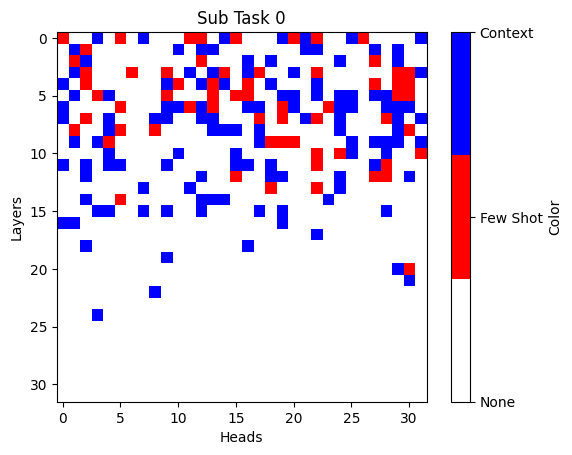

In [266]:
imshow(distribution, save=f'PartOfInput_index_{noise_index}_new', title=f"index {noise_index}", labels={"x":"Head", "y":"Layer"})


In [ ]:
import numpy as np
import plotly.express as px

# Example data: a 32x32 grid with values in the range [0, 3)
data = np.random.randint(0, 4, size=(32, 32))

# Create a custom color scale with distinct colors and corresponding labels
colors = ["red", "blue", "green", "white"]
labels = ["Label A", "Label B", "Label C", "Label D"]

# Create a figure with specified color labels
fig = px.imshow(data, color_continuous_scale=colors, labels=dict(color="Label"))

# Remove the gradient color scale
fig.update_coloraxes(colorbar_title_text='', showscale=False)

# Manually add text labels on the right side
fig.update_layout(annotations=[
    dict(
        text=label,
        x=1.1,
        y=(i + 0.5) / len(colors),
        xref='paper',
        yref='paper',
        showarrow=False,
        font=dict(size=12),
        bgcolor=colors[i],
        opacity=0.7,
        borderpad=4,
        bordercolor='black',
        borderwidth=1
    ) for i, label in enumerate(labels)
])

# Set the title
fig.update_layout(title_text="Your Plot Title")

# Add colored rectangles to indicate the colors corresponding to labels
for i, color in enumerate(colors):
    fig.add_shape(
        dict(
            type='rect',
            x0=1.15,
            x1=1.25,
            y0=(i + 0.3) / len(colors),
            y1=(i + 0.7) / len(colors),
            fillcolor=color,
            opacity=0.7,
            layer="below",
            line=dict(width=1, color='black')
        )
    )

# Show the plot
fig.show()


In [57]:
import numpy as np
import plotly.express as px

# Example data: a 32x32 grid with values in the range [0, 3)
data = np.random.randint(0, 4, size=(32, 32))

# Create a custom color scale with distinct colors and corresponding labels
colors = ["red", "blue", "green", "white"]
labels = ["Label A", "Label B", "Label C", "Label D"]

# Create a figure with specified color labels
fig = px.imshow(data, color_continuous_scale=colors, labels=dict(color="Label"))

# Remove the gradient color scale
fig.update_coloraxes(colorbar_title_text='', showscale=False)

# Manually add text labels on the right side
fig.update_layout(annotations=[
    dict(
        text=label,
        x=1.1,
        y=(i + 0.5) / len(colors),
        xref='paper',
        yref='paper',
        showarrow=False,
        font=dict(size=12),
        bgcolor=colors[i],
        opacity=0.7,
        borderpad=4,
        bordercolor='black',
        borderwidth=1
    ) for i, label in enumerate(labels)
])

# Set the title
fig.update_layout(title_text="Your Plot Title")

# Add colored rectangles to indicate the colors corresponding to labels
for i, color in enumerate(colors):
    fig.add_shape(
        dict(
            type='rect',
            x0=1.15,
            x1=1.25,
            y0=(i + 0.3) / len(colors),
            y1=(i + 0.7) / len(colors),
            fillcolor=color,
            opacity=0.7,
            layer="below",
            line=dict(width=1, color='black')
        )
    )

# Show the plot
fig.show()


[0, 1, 2, 3]
[(0.267004, 0.004874, 0.329415, 1.0), (0.127568, 0.566949, 0.550556, 1.0), (0.993248, 0.906157, 0.143936, 1.0), (0.993248, 0.906157, 0.143936, 1.0)]
[<matplotlib.patches.Patch object at 0x7fa845702470>, <matplotlib.patches.Patch object at 0x7fa8454ddd20>, <matplotlib.patches.Patch object at 0x7fa8454ddd80>, <matplotlib.patches.Patch object at 0x7fa8454ddde0>]


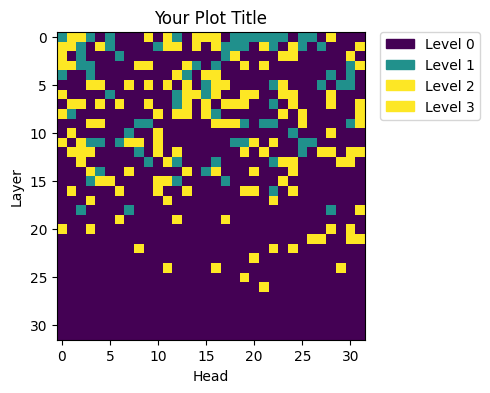

In [81]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# create some data
data = np.array(distribution)
# get the unique values from data
# i.e. a sorted list of all values in data
values = [0, 1, 2, 3]
print(values)
plt.figure(figsize=(8,4))
im = plt.imshow(data, interpolation='none')

# get the colors of the values, according to the 
# colormap used by imshow
colors = [ im.cmap(im.norm(value)) for value in values]
print(colors)
# create a patch (proxy artist) for every color 
patches = [ mpatches.Patch(color=colors[i], label="Level {l}".format(l=values[i]) ) for i in range(len(values)) ]
print(patches)
# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )

# plt.grid(True)
plt.title('Your Plot Title')
plt.xlabel('Head')
plt.ylabel('Layer')
plt.savefig('legend.svg')
plt.show()

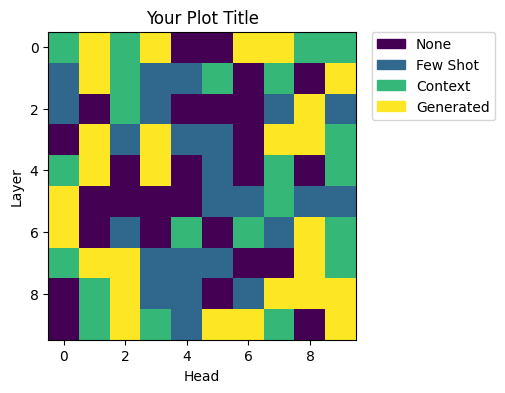

In [95]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
data = np.random.randint(0, 4, size=(10, 10))  # Sample distribution data

# Values and colors mapping
values = [0, 1, 2, 3]
colors = ['white', 'red', 'blue', 'green']
labels = ['None', 'Few Shot', 'Context', 'Generated']

plt.figure(figsize=(8, 4))
im = plt.imshow(data, interpolation='none')

# Get the colors of the values
colors = [im.cmap(im.norm(value)) for value in values]

# Create a patch (proxy artist) for every color
patches = [plt.Rectangle((0, 0), 1, 1, color=colors[i], label=labels[i]) for i in range(len(values))]

# Add legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.title('Your Plot Title')
plt.xlabel('Head')
plt.ylabel('Layer')
plt.savefig('legend.svg')
plt.show()


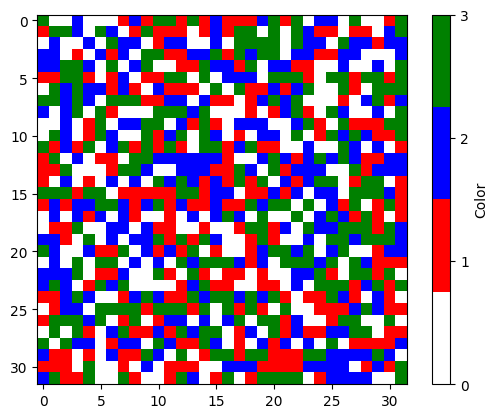

In [236]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your 32x32 array is stored in a variable called 'color_array'
# You can create a NumPy array with random values for demonstration
color_array = np.random.randint(4, size=(32, 32))

# Define the color map for visualization
cmap = plt.cm.colors.ListedColormap(['white', 'red', 'blue', 'green'])

# Plot the array using imshow
plt.imshow(color_array, cmap=cmap, interpolation='nearest')

# Add color bar for reference
plt.colorbar(ticks=[0, 1, 2, 3], label='Color')

# Show the plot
plt.show()
